## Lab 5 - Uninformed Search Algorithms

### 1. Breadth First Search
Breadth-First Search is a “blind” algorithm. It’s called “blind” because this algorithm doesn’t care about the cost between vertices on the graph.

The algorithm starts from a root node (which is the initial state of the problem) and explores all nodes at the present level prior to moving on to the nodes at the next level. If the algorithm finds a solution, returns it and stops the search, otherwise extends the node and continues the search process.

Breadth-First Search is “complete”, which means that the algorithm always returns a solution if exists. More specifically, the algorithm returns the solution that is closest to the root, so for problems that the transition from one node to its children nodes costs one, the BFS algorithm returns the best solution. In addition, in order to explore the nodes level by level, it uses a queue data structure, so new nodes are added at the end of the queue, and nodes are removed from the start of the queue. The pseudocode of the BFS algorithm is the following:
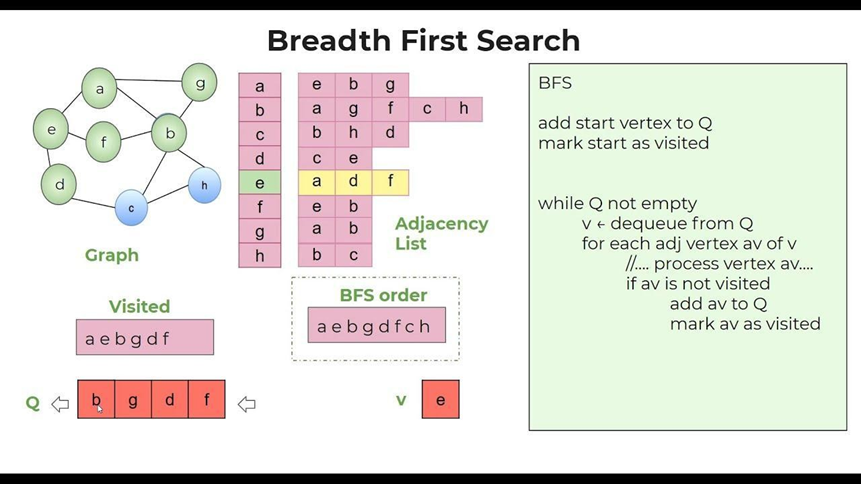



### 2. Depth First Search

The depth-first search or DFS algorithm traverses or explores data structures, such as trees and graphs.

The algorithm starts at the root node (in the case of a graph, you can use any random node as the root node) and examines each branch as far as possible before backtracking.
When a dead-end occurs in any iteration, the Depth First Search (DFS) method traverses a network in a deathward motion and uses a stack data structure to remember to acquire the next vertex to start a search.
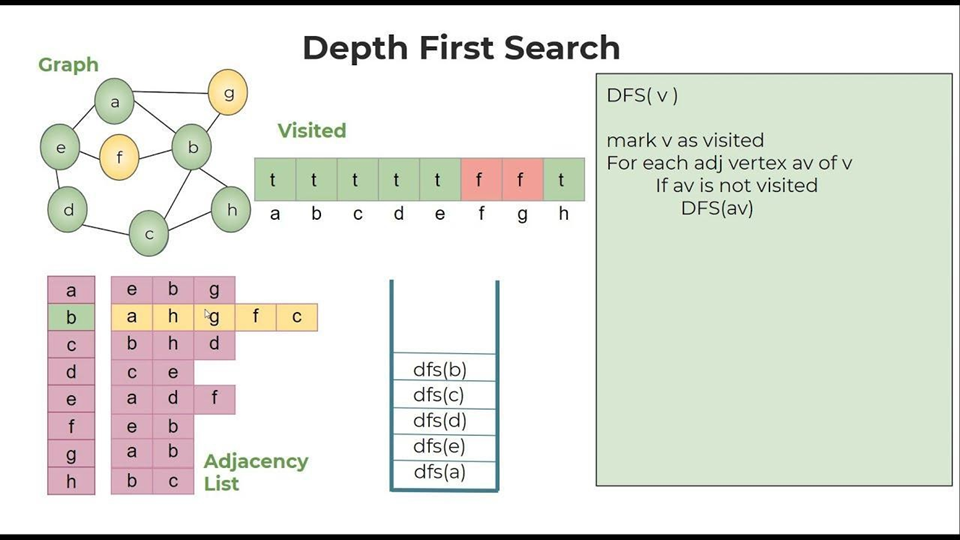

### 3. Uniform Cost Search
Uniform-Cost Search is similar to Dijikstra’s algorithm. 

In this algorithm from the starting state, we will visit the adjacent states and will choose the least costly state then we will choose the next least costly state from the all un-visited and adjacent states of the visited states, in this way we will try to reach the goal state (note we won’t continue the path through a goal state ), even if we reach the goal state we will continue searching for other possible paths( if there are multiple goals). We will keep a priority queue that will give the least costly next state from all the adjacent states of visited states.

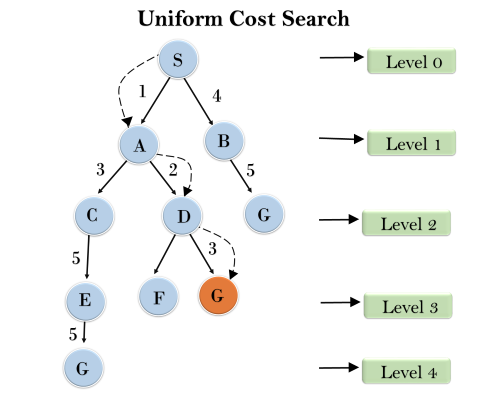


#### Algorithm:
Add the Starting node S in the frontier list with the path cost g(n) = 0 (starting point is at 0 path cost).

Add this node to the Explored list, as we only have a single node in the frontier list. If we have multiple nodes, then we will add that one node at the top of the frontier.

Now, explore this node by visiting all of its child nodes. After that, add this node to the Explored list, as it is now fully explored.

Check if the added node is the goal node or not. Stop if the goal node is found, or else move on to the next step.

Since new nodes are added to the frontier list, we need to compare and set the priority queue again, depending upon the priority, that is, the minimum path cost g(n).

Now, move to back to step 2 and repeat the steps until the goal node is not added to the explored list.

### Task 01: MAZE FINDER USING BFS
Suppose there is a maze such as an image shown below and we want to navigate from the entrance to the exit with the less possible movements. As a movement, we consider each movement from one room to another. In our example, the maze consists of eleven rooms each of them has a unique name like “A”, “B”, etc. So, our goal is to navigate from room “S” to “I”.

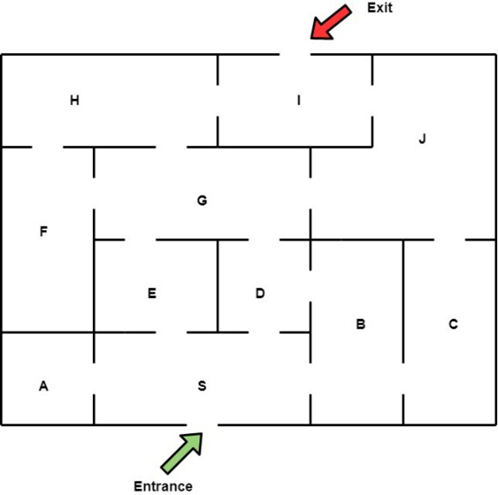
After defining the problem, it’s time to model it into a graph. A very common way to do this is to create a vertex for each room and an edge for each door of the maze. After this modeling, the graph consists of 11 vertices and 15 edges as it seems below.
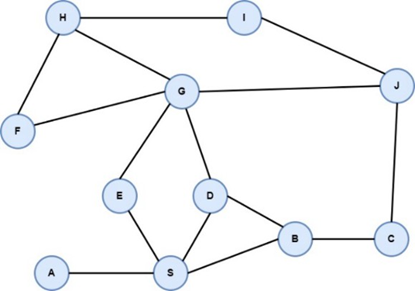
So, from each vertex we can navigate to its neighbors, starting from vertex “S” which is the initial state until the vertex “I” which is the target node of the problem. The BFS algorithm will explore all nodes at the present level prior to moving on to the nodes at the next level, as it seems in the following image:
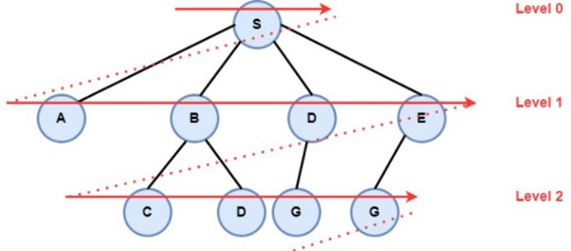

In [ ]:
def bfs(graph, start, goal):
    queue = [(start, [start])]
    visited = set()
    
    while queue:  
        node, path = queue.pop(0)  
        print(path)  

        if node == goal:  
            return path  
          
        if node not in visited:  
            visited.add(node)  
            for neighbor in graph[node]:  
                if neighbor not in visited:  
                    queue.append(  
                        (neighbor, path + [neighbor])  
                    )  

    return None  


In [2]:
# Example graph
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Starting and ending nodes
start_node = 'A'
end_node = 'F'

# Perform BFS and print the path from start to end
path = bfs(graph, start_node, end_node)
if path:
    print("Path from", start_node, "to", end_node, ":", path)
else:
    print("No path found from", start_node, "to", end_node)

['A']
['A', 'B']
['A', 'C']
['A', 'B', 'D']
['A', 'B', 'E']
['A', 'C', 'F']
Path from A to F : ['A', 'C', 'F']


### Task 02: MAZE FINDER USING DFS

Travrse the above graph using Depth First Search


In [1]:
def dfs(graph, start, end):
    stack = [(start, [start])]
    visited = set()
    
    while stack:
        node, path = stack.pop()
        print(path)
        
        if node == end:
            return path
        
        if node not in visited:
            visited.add(node)
            
            for neighbor in reversed(graph[node]):
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))
    
    return None


In [2]:
# Example graph
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Starting and ending nodes
start_node = 'A'
end_node = 'F'

# Perform DFS and print the path from start to end
path = dfs(graph, start_node, end_node)
if path:
    print("Path from", start_node, "to", end_node, ":", path)
else:
    print("No path found from", start_node, "to", end_node)

['A']
['A', 'B']
['A', 'B', 'D']
['A', 'B', 'E']
['A', 'B', 'E', 'F']
Path from A to F : ['A', 'B', 'E', 'F']


### Task 03: Finding the Shortest Path for a School Field Trip using Uniform Cost Search


A group of students from a high school is planning a field trip to various historical sites in the city. They want to visit as many sites as possible while minimizing the travel time between each site. The students have a list of historical sites they want to visit and the distances between them.


The students are tasked with implementing the uniform cost search algorithm to find the shortest path between the historical sites. They need to consider the distances between each pair of sites and account for the time it takes to travel from one site to another.

To implement uniform cost search:

1. The students will represent the historical sites and their connections as a graph, where each node represents a site and each edge represents the distance between two sites.

2. They will assign costs to each edge based on the distance between the connected sites. The cost represents the time it takes to travel from one site to another.

3. The students will implement the uniform cost search algorithm to find the shortest path between the starting point (the high school) and all the historical sites they plan to visit.

4. Once they have found the shortest path, the students will plan their field trip itinerary based on the order of the sites along the shortest path, ensuring they visit each site while minimizing travel time.

5. Finally, the students will present their field trip plan to the club advisor, including the list of historical sites to visit and the optimized itinerary based on the shortest path found using the uniform cost search algorithm.

By implementing uniform cost search, the students can efficiently plan their field trip itinerary, ensuring they make the most of their time exploring the city's historical sites while minimizing travel time between each site.


In [7]:
historical_sites = {
    'Badshahi Mosque': {'Lahore Fort': 100, 'Shalimar Gardens': 250, 'Wazir Khan Mosque': 400},
    'Lahore Fort': {'Badshahi Mosque': 100, 'Shalimar Gardens': 200, 'Wazir Khan Mosque': 150},
    'Shalimar Gardens': {'Badshahi Mosque': 250, 'Lahore Fort': 200, 'Wazir Khan Mosque': 300, 'Lahore Museum': 350},
    'Wazir Khan Mosque': {'Badshahi Mosque': 400, 'Lahore Fort': 150, 'Shalimar Gardens': 300, 'Lahore Museum': 450, 'Minar-e-Pakistan': 200},
    'Lahore Museum': {'Minar-e-Pakistan': 500, 'Shalimar Gardens': 350, 'Wazir Khan Mosque': 450},
    'Minar-e-Pakistan': {'Lahore Museum': 500, 'Wazir Khan Mosque': 200}
}



In [13]:
def uniform_cost_search(graph, start, goal):
    visited = set()
    queue = [(0, start, [])]
    
    while queue:
        cost, node, path = queue.pop(0)
        if node == goal:
            return cost
        
        if node not in visited:
            visited.add(node)
            
        # print(historical_sites[node])
        for neighbor, edge_cost in historical_sites[node].items():
            if neighbor not in visited:
                queue.append((cost + edge_cost, neighbor, path + [node]))
                    
            queue.sort()
    
    return None

In [14]:
#build a graph from the historical sites given above
# graph = {}

# Starting and ending points
start_point = 'Badshahi Mosque'
end_point = 'Minar-e-Pakistan'

# Call uniform_cost_search function
cost = uniform_cost_search(graph, start_point, end_point)

if cost != float('inf'):
    print("The cost of the shortest path from", start_point, "to", end_point, "is:", cost)
else:
    print("There is no path from", start_point, "to", end_point)



The cost of the shortest path from Badshahi Mosque to Minar-e-Pakistan is: 450
